In [1]:
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
random.seed(42)
pd.options.display.max_rows = 999

%matplotlib inline

In [2]:
def parse_df_via_individual(individual):
    '''This function parses the train and test set via the individual
    passed. The individual is comprised of a list of len(train_set)
    that contains either 0 or 1. 0 or 1 corresponds to whether 
    that specific column should be used.
    
    Args:
        individual (list(int)): The specific individual thats a list comprised of 1s or 0s
        train_set (pd.DataFrame): The dataframe containg the test set
        test_set (pd.DataFrame): The dataframe contain the train set
    Returns:
        (pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame): The parsed X_train and X_test
    '''
    
    global X_train
    global y_train
    global X_test
    global y_test
    
    bool_individual = list(map(bool, individual))
    bool_df = pd.DataFrame({'a': bool_individual})
    
    X_train_parsed = X_train[X_train.columns[bool_individual]]
    X_test_parsed = X_test[X_test.columns[bool_individual]]
    
    return (X_train_parsed, y_train, X_test_parsed, y_test)


def calculate_correlation(arr):
    '''Function takes the resulting split done by the train_test_split
    function and converts it to a pandas DataFrame and then returns 
    the sum of the sum of the correlation generated by the corr function.
    
    Args:
        arr (np.array(...)): The specific 'X_train' generated by the 
                             train_test_split function
                             
    Returns:
        float: The resulting correlation calculation
    
    '''
    df = pd.DataFrame(arr)
    correlation = df.corr().sum().sum()
    
    return correlation


def load_data(files=['BRAF_train_moe_class.csv', 'BRAF_test_moe_class.csv'], drop = True):
    '''Loads the data from the specific two files given 
    and then concatenates the two to a single DataFrame.
    The function also drops the specific rows that contain
    rows as well as converting the data format to float
    
    Args:
        files (list(str))(optional): The specific file list of csvs to parse
        drop (bool): Whether or not to use the files with the dropped column
                     this column will then have to be parsed and coverted to a 
                     format that works with the calculations (int/ float)
                     
    Returns:
        pd.DataFrame: The resulting DataFrame from the format change
    '''
    
    if drop:
        train_df = pd.read_csv(files[0]).drop('PUBCHEM_COORDINATE_TYPE', axis=1)
        test_df = pd.read_csv(files[1]).drop('PUBCHEM_COORDINATE_TYPE', axis=1)
    else:
        train_df = pd.read_csv(files[0])
        test_df = pd.read_csv(files[1])
        
    df = pd.concat(objs = [train_df, test_df], join = 'inner')
    df = df.dropna(axis = 0)
    df = df.astype(float)
    
    return df


def generate_individual(X_train):
    '''Takes the X_train dataset generated by the 
    train_test_split and returns a list of integers that represent
    boolean values via either 0 or 1. 
    
    Args:
        X_train (pd.DataFrame): The specific X_train generated by 
                                the train_test_split function. 
                                
    Returns:
        list(int): The specific individual generated by the building a
                   list of integers are either 1 or 0
                   
    Example:
        >>> generate_individual(X_train)
        [ 1, 0, 1, 1, 1, ...]'''
    return [random.randint(0, 1) for x in range(len(X_train.columns))]


def fitness(individual):
    """Function that outputs the error rate given a train and 
    test set.
    
    The function takes an individual, a train set, and a test 
    set. The individual is comprised of a list of len(train_set)
    that contains either 0 or 1. 0 or 1 corresponds to whether 
    that specific column should be used. The train set and test 
    set are used to fit and predict the values in the test set
    
    Args:
        individual (list(int)): The specific individual thats a list comprised of 1s or 0s
        train_set (pd.DataFrame): The dataframe containg the test set
        test_set (pd.DataFrame): The dataframe contain the train set
        
    Returns:
        double: The error rate give the columns passed by the individual
        
    Example:
        >>> individual = [random.randint(0, 1) for x in len(X_train.columns)]
        >>> fitness(individual, (X_train, y_train), (X_test, y_test))
        0.30
        
    """
    
    
    X_train_in, y_train_in, X_test_in, y_test_in = parse_df_via_individual(individual)
    
    if len(X_train.columns) == 0:    
        return 1.0
    
    X_train_scaled, X_test_scaled = scale(X_train_in), scale(X_test_in)
    
    clf = svm.SVC()
    clf.fit(X_train_scaled, y_train_in)
    y_pred = clf.predict(X_test_scaled)
    
    acc = accuracy_score(y_true=y_test_in, y_pred=y_pred)
    total_correlation = calculate_correlation(X_train_in)
    
    return acc * total_correlation

In [60]:
df = load_data()
y = df['class']
X = df.drop(['class'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

result = []
for _ in range(200):
    individual = generate_individual(X_train)
    resulting_calculation = fitness(individual)
    result.append(resulting_calculation)

/home/matthew/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/matthew/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/matthew/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/matthew/miniconda3/lib/python3.6/site-packa

/home/matthew/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/matthew/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/matthew/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/matthew/miniconda3/lib/python3.6/site-packa

/home/matthew/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/matthew/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/matthew/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/matthew/miniconda3/lib/python3.6/site-packa

/home/matthew/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/matthew/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/matthew/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/matthew/miniconda3/lib/python3.6/site-packa

/home/matthew/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/matthew/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/matthew/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/matthew/miniconda3/lib/python3.6/site-packa

/home/matthew/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/matthew/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/matthew/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/matthew/miniconda3/lib/python3.6/site-packa

/home/matthew/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/matthew/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/matthew/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/matthew/miniconda3/lib/python3.6/site-packa

/home/matthew/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/matthew/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/matthew/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [22]:
result

[1740.5209479637408,
 2745.1945516243577,
 2204.9837283691495,
 2579.735211624427,
 3283.169080043503,
 3206.813051024101,
 2005.1983949107491,
 2666.4377892392554,
 2087.8052986586567,
 2157.859510972201,
 1707.53661740655,
 2476.8420378208593,
 2248.219727601104,
 2518.8420558283847,
 2649.6645262621328,
 2089.982605463907,
 2710.4849719566737,
 2418.892382738026,
 2249.3595562739183,
 3391.9023619783043,
 2969.856571927635,
 3209.2784481706503,
 2141.926765042285,
 2738.5160448721954,
 2770.6186001291826,
 3141.5167434637333,
 2805.6176833734553,
 2740.385194997804,
 2875.9133213759637,
 2798.576140749969,
 2223.812883771019,
 1890.111413403158,
 2724.9471637180704,
 1876.0624087312253,
 3008.915609929697,
 3402.507439152365,
 3607.934079126031,
 2497.084907843545,
 1924.4278638498267,
 2361.9971417631623,
 2559.844511962996,
 2244.5724846330813,
 3079.6141302118067,
 1566.1892006619214,
 2812.4699570073453,
 2336.202840456551,
 2130.96124368397,
 2410.591706749581,
 3261.4799512270

In [44]:
X

,IC50,PUBCHEM_XLOGP3_AA,PUBCHEM_EXACT_MASS,PUBCHEM_MOLECULAR_WEIGHT,PUBCHEM_CACTVS_TPSA,PUBCHEM_MONOISOTOPIC_WEIGHT,PUBCHEM_TOTAL_CHARGE,PUBCHEM_HEAVY_ATOM_COUNT,PUBCHEM_ATOM_DEF_STEREO_COUNT,PUBCHEM_ATOM_UDEF_STEREO_COUNT,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb
0,26000.00000,3.1,393.16885,393.43573,81.699997,393.16885,0.0,29.0,0.0,0.0,...,113.500,23.875,7.375,0.250,0.000,0.000,393.44299,2450.0,45.0,146.0
1,18000.00000,2.0,353.13754,353.37186,81.199997,353.13754,0.0,26.0,0.0,0.0,...,112.250,27.250,8.750,1.625,0.000,0.000,353.37799,1786.0,41.0,132.0
2,4000.00000,2.9,353.13754,353.37186,85.699997,353.13754,0.0,26.0,0.0,0.0,...,101.500,22.125,6.500,0.375,0.000,0.000,353.37799,1767.0,41.0,132.0
3,14000.00000,3.5,409.16376,409.43512,91.800003,409.16376,0.0,30.0,0.0,0.0,...,94.750,15.375,5.000,0.375,0.000,0.000,409.44199,2694.0,48.0,150.0
4,9800.00000,3.0,362.13788,362.38193,89.300003,362.13788,0.0,27.0,0.0,0.0,...,98.750,15.750,5.000,0.375,0.000,0.000,362.38898,1976.0,43.0,136.0
5,3500.00000,2.4,394.16409,394.42377,94.599998,394.16409,0.0,29.0,0.0,0.0,...,127.875,24.875,7.625,1.125,0.000,0.000,394.43100,2450.0,45.0,146.0
6,1100.00000,2.1,380.14847,380.39719,109.000000,380.14847,0.0,28.0,0.0,0.0,...,157.000,34.875,11.125,0.875,0.000,0.000,380.40399,2244.0,45.0,142.0
7,3000.00000,2.7,365.13754,365.38257,82.599998,365.13754,0.0,27.0,0.0,0.0,...,88.125,12.500,3.750,0.000,0.000,0.000,365.38898,2014.0,43.0,136.0
8,26000.00000,2.3,367.15320,367.39844,85.699997,367.15320,0.0,27.0,0.0,0.0,...,97.875,17.500,5.000,0.375,0.000,0.000,367.40500,2014.0,43.0,136.0
9,140.00000,5.1,429.21646,429.51419,81.099998,429.21646,0.0,32.0,0.0,0.0,...,120.875,18.500,4.750,0.375,0.000,0.000,429.52399,3410.0,51.0,172.0


[[1.25893167 0.37132285 0.59267179 ... 0.45427316 0.56601556 0.70182095]
 [0.73687102 1.37726989 1.10675437 ... 0.82834021 0.98455809 1.16628748]
 [0.17673511 0.55422215 1.10675437 ... 0.83904394 0.98455809 1.16628748]
 ...
 [4.13026525 0.27987302 0.4131497  ... 0.28695702 0.25210867 0.30370678]
 [5.17438655 0.09697345 0.22037954 ... 0.14724523 0.04283741 0.17100206]
 [5.63118962 0.26882541 0.04039039 ... 0.02739451 0.27106949 0.03829734]]


/home/matthew/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2253: RuntimeWarning: divide by zero encountered in true_divide
  return (a - mns) / sstd
/home/matthew/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2253: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


{'whiskers': [<matplotlib.lines.Line2D at 0x7f2f563cd2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2f563cd940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2f563cd160>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2f563cdfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2f563df358>],
 'means': []}

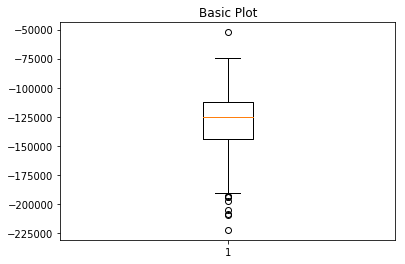

In [65]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(X))
print(z)

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(X['AM1_E'])


In [62]:
X_pruned

,IC50,PUBCHEM_XLOGP3_AA,PUBCHEM_EXACT_MASS,PUBCHEM_MOLECULAR_WEIGHT,PUBCHEM_CACTVS_TPSA,PUBCHEM_MONOISOTOPIC_WEIGHT,PUBCHEM_TOTAL_CHARGE,PUBCHEM_HEAVY_ATOM_COUNT,PUBCHEM_ATOM_DEF_STEREO_COUNT,PUBCHEM_ATOM_UDEF_STEREO_COUNT,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb
